# Investment Analysis Assignment

#### Sparks fund(an assets management company) is looking to invest in few companies by analysing the global trends in investments. Sparks fund’s objective is to identify the top sectors, countries and best investment type for making the investments.  The strategy is to invest where most investors are investing.  This analysis is expected to provide the investment observations and conclusions to the Spark funds CEO. 

**Sparks funds has mentioned a few constraints for their investments
1. Invest between 5 to 5 million USD per round of investment
2. Invest only in English speaking countries due to the ease of communication with the companies invested in

**Some goals defined for the data analysis:
1. Investment type analysis  - compare the investment amounts in different investment types and chose the best type for investment
2. Country analysis  - identify the top English speaking countries to invest in.
3. Sector – analyse the distribution of investments across 8 main sectors and identify the top sectors for investments

**Finally, recommend to Spark funds on the best investment type in the top countries and sectors 

##### Investment data from crunchbase.com will be used for the analysis.

# Checkpoint 1: Data Cleaning 1

### 1.1 Load the companies and rounds2 files into dataframes

In [321]:
# load all the required packages
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline
import numpy as np
import seaborn as sns


In [322]:
pd.options.display.float_format = '{:.2f}'.format

In [323]:
# check the encoding of the companies file
with open("companies.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'utf-8', 'confidence': 0.7525, 'language': ''}


In [324]:
# check the encoding of the rounds2 file
with open("rounds2.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [325]:
## Load the companies into a dataframe with the correct encoding.  Though chardet says encoding of companies file is Windows-1252
## the encoding of the file is ISO-8859-1
companies = pd.read_csv("companies.csv",encoding='ISO-8859-1')

In [326]:
## Load the companies into a dataframe with the required encoding
rounds2 = pd.read_csv("rounds2.csv",encoding='ISO-8859-1')

In [327]:
# check if companies is loaded ok
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [328]:
# check if rounds2 is loaded ok
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


### 1.2 Clean rounds2 and companies data

In [329]:
# Check column info of companies to know the datatypes
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [330]:
## get the % of nulls in each column of rounds2
rounds2.isnull().sum()/rounds2.shape[0]*100

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
dtype: float64

round2 permalink does not have null values. To standardize for comparison convert the permalink to lowercase

In [331]:
# on looking at the data the rounds2 the same company has upper and lower names. covert all to lowercase
rounds2['company_permalink']= rounds2['company_permalink'].str.lower()
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


In [332]:
# Check column info of companies to know the datatypes
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [333]:
## get the % of nulls in each column of companies
companies.isnull().sum()/companies.shape[0]*100

permalink        0.00
name             0.00
homepage_url     7.62
category_list    4.74
status           0.00
country_code    10.48
state_code      12.88
region          12.10
city            12.10
founded_at      22.93
dtype: float64

companies permalink does not have null values. To standardize for comparison convert the permalink to lowercase

In [334]:
# similar to rounds2 conver the permalink column to lower in companies
companies['permalink'] = companies['permalink'].str.lower()
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


Find the unique permalinks in the rounds2 and companies and compare

In [335]:
## find the number of unique companies in rounds2
rounds2['company_permalink'].nunique()

66370

In [336]:
## find the number of unique companies in companies
companies['permalink'].nunique()

66368

There is a mismatch in the number of unique companies between companies and rounds2.  Let's check this and understand the reasons and clean them if necessary

In [337]:
# companies in the rounds2 file that are not in the companies 
rounds2[~rounds2['company_permalink'].isin(companies['permalink'])]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,nan
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,nan
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,nan
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.00
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,nan
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,nan
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,nan


In [338]:
# companies in the rounds2 file that are not in the companies 
companies[~companies['permalink'].isin(rounds2['company_permalink'])]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
16827,/organization/e-cãbica,E CÃBICA,NaN,NaN,operating,NaN,NaN,NaN,NaN,NaN
18197,/organization/energystone-games-çµçÿ³æ¸¸æ,EnergyStone Games çµç³æ¸¸æ,NaN,Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,06-01-2013
26139,/organization/huizuche-com-æ ç§è½¦,Huizuche.com æ ç§è½¦,http://huizuche.com,NaN,closed,NaN,NaN,NaN,NaN,24-04-2014
58344,/organization/tipcat-interactive-æ²èä¿¡æ¯ç...,TipCat Interactive æ²èä¿¡æ¯ç§æ,http://www.tipcat.com,Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,18-08-2009
65778,/organization/zengame-ç¦ æ¸¸ç§æ,ZenGame ç¦ æ¸¸ç§æ,http://www.zen-game.com,Internet|Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,17-07-2010


The mismatch is happening due to non-ascii characters present in the permalink columns of both companies and rounds2.  This neds to be cleaned

In [339]:
# find the rows that have non-ascii charactersin round2
rounds2[rounds2['company_permalink'].str.contains('[^\x00-\x7F]',regex=True)]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
77,/organization/10â°north,/funding-round/b41ff7de932f8b6e5bbeed3966c0ed6a,equity_crowdfunding,NaN,12-08-2014,nan
729,/organization/51wofang-æ å¿§ææ¿,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,5000000.00
2670,/organization/adslinkedâ¢,/funding-round/449ae54bb63c768c232955ca6911dee4,seed,NaN,29-09-2014,100000.00
3166,/organization/aesthetic-everythingâ®-social-ne...,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,NaN,12-10-2014,nan
3291,/organization/affluent-attachã©-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,NaN,15-10-2014,100000.00
4568,/organization/allgã¤u-outlet,/funding-round/49e8a9b54ed19c8505ca92dc031a8e9c,venture,NaN,17-03-2015,1400000.00
8097,/organization/asiansbookâ¢,/funding-round/3f243ab92b4fe397d41b4734a17ca5f0,seed,NaN,15-09-2014,100000.00
8652,/organization/atã¶lye-gri,/funding-round/75bdeacd95a647108aa4bc480e77894d,grant,NaN,01-11-2012,13940.00
9784,/organization/axã¨gaz,/funding-round/511a41181aaf193bbd419babfb8d66e9,venture,NaN,06-07-2015,4094392.00
14311,/organization/borã©al-bikes-incorporated,/funding-round/be79575bf4b5b5d6fa64670800a3ca5e,seed,NaN,26-02-2015,nan


In [340]:
# remove any non-ascii charcters from the permalink column in rounds2
rounds2['company_permalink'] = rounds2['company_permalink'].str.encode('ascii',errors='ignore').str.decode('utf-8')

In [341]:
# find the rows that have non-ascii characters
rounds2[rounds2['company_permalink'].str.contains('[^\x00-\x7F]',regex=True)]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


In [342]:
# find the rows that have non-ascii characters in permalink column
companies[companies['permalink'].str.contains('[^\x00-\x7F]',regex=True)]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
43,/organization/10â°north,10Â°North,NaN,Fashion,operating,CAN,ON,Toronto,Mississauga,05-01-2013
426,/organization/51wofang-æ å¿§ææ¿,51wofang æ å¿§ææ¿,http://www.51wofang.com,NaN,closed,NaN,NaN,NaN,NaN,01-01-2014
1506,/organization/adslinkedâ¢,AdsLinkedâ¢,http://www.adslinked.com,Advertising|Internet,operating,NaN,NaN,NaN,NaN,NaN
1775,/organization/aesthetic-everythingâ®-social-ne...,Aesthetic EverythingÂ® Social Network,http://aestheticeverything.com/,Public Relations,operating,USA,CA,Los Angeles,Marina Del Rey,15-06-2009
1834,/organization/affluent-attachã©-club-2,Affluent AttachÃ© Club,http://www.affluentattache.com/,Hospitality,operating,USA,CA,Los Angeles,Beverly Hills,NaN
2556,/organization/allgã¤u-outlet,AllgÃ¤u Outlet,http://allgaeuoutlet.de/,Fashion,operating,DEU,2,DEU - Other,Sonthofen,NaN
4567,/organization/asiansbookâ¢,Asiansbookâ¢,http://www.asiansbook.com,Social Media|Social Network Media,operating,NaN,NaN,NaN,NaN,NaN
4903,/organization/atã¶lye-gri,AtÃ¶lye Gri,http://www.atolyegri.com/,Advertising,operating,NaN,NaN,NaN,NaN,NaN
5490,/organization/axã¨gaz,AxÃ¨gaz,http://www.axegaz.com/,Energy,operating,FRA,A8,Paris,Levallois-perret,01-01-2012
8131,/organization/borã©al-bikes-incorporated,BorÃ©al Bikes Incorporated,http://www.borealbikes.com,Automotive|Design|Manufacturing,operating,DEU,16,Berlin,Berlin,01-01-2014


In [343]:
# remove any non-ascii charcters from the permalink column
companies['permalink'] = companies['permalink'].str.encode('ascii',errors='ignore').str.decode('utf-8')

In [344]:
# find the rows that have non-ascii characters in permalink column
companies[companies['permalink'].str.contains('[^\x00-\x7F]',regex=True)]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


### 1.3 Check unique value and merge Rounds2 and Companies

In [345]:
# check the number of unique companies in rounds2
rounds2['company_permalink'].nunique()

66368

In [346]:
# check the number of unique companies in rounds2
companies['permalink'].nunique()

66368

In [347]:
# companies in the rounds2 file that are not in the companies 
rounds2[~rounds2['company_permalink'].isin(companies['permalink'])]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


In [348]:
# companies in the rounds2 file that are not in the companies 
companies[~companies['permalink'].isin(rounds2['company_permalink'])]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [349]:
# rename the company_permalink column in rounds2 to enable matching with companies
rounds2.rename(columns={'company_permalink': 'permalink'},inplace=True)
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
permalink                  114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [350]:
# Merge the Rounds2 and companies dataframes
master_frame = pd.merge(rounds2, companies, how='inner', on='permalink')
master_frame.head()


,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [351]:
# observations in the master frame
master_frame.shape

(114949, 15)

In [352]:
##  save the master frame is another file
master_frame.to_csv('master_frame.csv',index=False)

### 1.4  Handle missing and invalid values

In [353]:
## read the master frame from the saved file
mf =  pd.read_csv('master_frame.csv',encoding='ISO-8859-1')

In [354]:
# check if the file is loaded ok
mf.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [355]:
## check master_frame info
mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 15 columns):
permalink                  114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(14)
memory usage: 13.2+ MB


In [356]:
## check the % of null values in the columns
mf.isnull().sum()/mf.shape[0]*100

permalink                  0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
name                       0.00
homepage_url               5.34
category_list              2.97
status                     0.00
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
dtype: float64

The funding round_code, funded at, home page url, founded at are not useful for future analysis. So these can be dropped

In [357]:
mf.drop(columns=['funding_round_code','funded_at','homepage_url','founded_at','state_code','region','city'],inplace=True)
mf.columns

Index(['permalink', 'funding_round_permalink', 'funding_round_type',
       'raised_amount_usd', 'name', 'category_list', 'status', 'country_code'],
      dtype='object')

In [358]:
## check the % of null values in the columns
mf.isnull().sum()/mf.shape[0]*100

permalink                  0.00
funding_round_permalink    0.00
funding_round_type         0.00
raised_amount_usd         17.39
name                       0.00
category_list              2.97
status                     0.00
country_code               7.55
dtype: float64

The raised_amount_usd has the maximum number of null values.  Check this column

In [359]:
## describe the raised amount usd to get the spread
mf['raised_amount_usd'].describe()

count         94959.00
mean       10426869.33
std       114821247.98
min               0.00
25%          322500.00
50%         1680511.00
75%         7000000.00
max     21271935000.00
Name: raised_amount_usd, dtype: float64

There is a huge difference between mean and median. Hence not a good idea to impute either the mean or median. hence drop the null value rows

In [360]:
##  drop the rows with null values in the raised_amount_usd
mf = mf[~(mf['raised_amount_usd'].isnull())]

In [361]:
## check the % of null values in the columns
mf.isnull().sum()/mf.shape[0]*100

permalink                 0.00
funding_round_permalink   0.00
funding_round_type        0.00
raised_amount_usd         0.00
name                      0.00
category_list             1.10
status                    0.00
country_code              6.16
dtype: float64

Now there are no nulls in the raised_amount_usd column.  Now remove the nulls in the country_code column

In [362]:
##  drop the rows with null values in the raised_amount_usd
mf = mf[~(mf['country_code'].isnull())]

In [363]:
## check the % of null values in the columns
mf.isnull().sum()/mf.shape[0]*100

permalink                 0.00
funding_round_permalink   0.00
funding_round_type        0.00
raised_amount_usd         0.00
name                      0.00
category_list             0.65
status                    0.00
country_code              0.00
dtype: float64

Now there are no nulls in the country_code column also. Remove the nulls from the category_list column

In [364]:
##  drop the rows with null values in the raised_amount_usd
mf = mf[~(mf['category_list'].isnull())]

In [365]:
## check the % of null values in the columns
mf.isnull().sum()/mf.shape[0]*100

permalink                 0.00
funding_round_permalink   0.00
funding_round_type        0.00
raised_amount_usd         0.00
name                      0.00
category_list             0.00
status                    0.00
country_code              0.00
dtype: float64

Now there are no null values in any of the columns

Convert the category list into lower case for future use

In [366]:
##  convert the category list to lower case for future matching
mf['category_list'] = mf['category_list'].str.lower()

In [367]:
## check of the category list is converted to lower case
mf.head()

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.00,#fame,media,operating,IND
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.00,:Qounter,application platforms|real time|social network...,operating,USA
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.00,0-6.com,curated web,operating,CHN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,41250.00,01Games Technology,games,operating,HKG
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,43360.00,Ondine Biomedical Inc.,biotechnology,operating,CAN


Check if there are any invalid characters in the category list column

In [368]:
# find the rows that have non-ascii characters in category_list column
mf[mf['category_list'].str.contains('[^\x00-\x7F]',regex=True)]

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code


Check if all the country codes are valid and clean them if needed

In [369]:
# get the unique list of country codes from compani
mf['country_code'].unique()

array(['IND', 'USA', 'CHN', 'HKG', 'CAN', 'CHL', 'GBR', 'FRA', 'AUS',
       'ROM', 'KOR', 'NLD', 'SWE', 'RUS', 'DNK', 'NOR', 'COL', 'ESP',
       'BEL', 'IRL', 'ITA', 'ISR', 'SGP', 'NZL', 'CHE', 'BRA', 'SVN',
       'JOR', 'HUN', 'JPN', 'BWA', 'DEU', 'NGA', 'FIN', 'CYP', 'CRI',
       'IDN', 'PRT', 'ARG', 'TWN', 'THA', 'SVK', 'UKR', 'LTU', 'ISL',
       'MEX', 'TUR', 'VEN', 'URY', 'AUT', 'KEN', 'ZAF', 'PHL', 'MNE',
       'MYS', 'PER', 'POL', 'EGY', 'PAN', 'LVA', 'GGY', 'VNM', 'UGA',
       'HRV', 'EST', 'BGR', 'MUS', 'LBN', 'GRC', 'NPL', 'LUX', 'CZE',
       'ARE', 'SAU', 'PAK', 'IRN', 'ALB', 'BAH', 'ARM', 'BGD', 'MDA',
       'GHA', 'TUN', 'ZWE', 'BRB', 'NIC', 'TAN', 'TTO', 'CMR', 'SRB',
       'PRI', 'BLR', 'CYM', 'ECU', 'SLV', 'MLT', 'GTM', 'ZMB', 'GIB',
       'BHR', 'TGO', 'BMU', 'HND', 'MCO', 'MMR', 'KAZ', 'QAT', 'MAR',
       'LIE', 'GEO', 'DOM', 'DZA', 'JAM', 'KNA', 'AZE', 'SEN', 'RWA',
       'DMA', 'UZB', 'BLZ', 'OMN', 'PSE', 'KWT', 'KHM', 'CIV', 'BLM',
       'GRD', 'LAO',

In [370]:
#On verifying the list of country codes in https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes
## the codes ROM, BAH, TAN were not found.
## Based on some analysis in the companies dataset with the states and cities and some google search on the contries ROM is Romania, 
## BAH is Bahamas and TAN is Tanzania. Get the correct country codes for them and replace in companies
mf['country_code'] = mf['country_code'].str.replace('ROM','ROU')
mf['country_code'] = mf['country_code'].str.replace('BAH','BHS')
mf['country_code'] = mf['country_code'].str.replace('TAN','TZA')
mf[mf['country_code'].isin(['ROU', 'BHS', 'TZA'])].shape

(51, 8)

Check the % of rows retained

In [372]:
mf.shape[0]/master_frame.shape[0]*100

77.01589400516751

In [373]:
## check the % of null values in the columns one last time before proceeding into the analysis
mf.isnull().sum()/mf.shape[0]*100

permalink                 0.00
funding_round_permalink   0.00
funding_round_type        0.00
raised_amount_usd         0.00
name                      0.00
category_list             0.00
status                    0.00
country_code              0.00
dtype: float64

In [374]:
## write the cleaned master frame to a dataset
mf.to_csv('master_frame_clean.csv',index=False)

 ## Checkpoint 2: Funding Type Analysis

In [375]:
## read the master frame from the saved file
mf_1 =  pd.read_csv('master_frame_clean.csv',encoding='ISO-8859-1')

In [376]:
## check if the master frame has loaded ok
mf_1.head()

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.00,#fame,media,operating,IND
1,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.00,:Qounter,application platforms|real time|social network...,operating,USA
2,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.00,0-6.com,curated web,operating,CHN
3,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,41250.00,01Games Technology,games,operating,HKG
4,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,43360.00,Ondine Biomedical Inc.,biotechnology,operating,CAN


In [377]:
## select only the 4 funding types of interest
funding_type = ['venture','angel','seed','private_equity']
mf_1 =  mf_1[mf_1['funding_round_type'].isin(funding_type)]
mf_1['funding_round_type'].unique()

array(['venture', 'seed', 'private_equity', 'angel'], dtype=object)

Check the range of the raised amount and identify whether to use the mean or median as the representative value

In [378]:
# describe the raised amount column
format_dict = {'raised_amount_usd':'${0:,.0f}'}
mf_1.raised_amount_usd.describe().reset_index().style.format(format_dict)

,index,raised_amount_usd
0,count,"$75,124"
1,mean,"$9,519,475"
2,std,"$77,927,782"
3,min,$0
4,25%,"$470,585"
5,50%,"$2,000,000"
6,75%,"$8,000,000"
7,max,"$17,600,000,000"


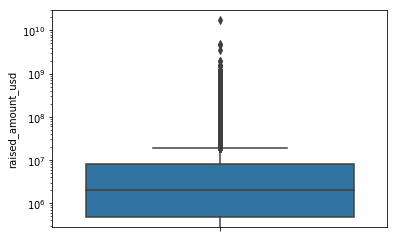

In [379]:
sns.boxplot(y='raised_amount_usd',data=mf_1)
plt.yscale('log')
plt.show()

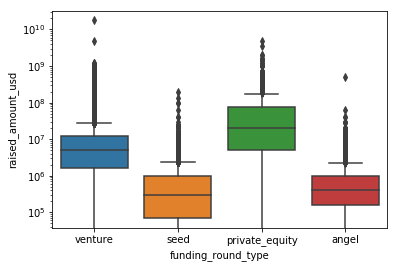

In [380]:
sns.boxplot(x='funding_round_type',y='raised_amount_usd',data=mf_1)
plt.yscale('log')
plt.show()

Based on the above there are outliers in all the 4 funding round types and the gap between mean and median is very high.
So the representative value to be used is median

In [381]:
# find the median of funding by each funding type
format_dict = {'raised_amount_usd':'${0:,.0f}'}
mf_1.groupby(by='funding_round_type').raised_amount_usd.median().sort_values(ascending=False).reset_index().style.format(format_dict)

,funding_round_type,raised_amount_usd
0,private_equity,"$20,000,000"
1,venture,"$5,000,000"
2,angel,"$414,906"
3,seed,"$300,000"


Based on the above analysis and Spark fund's interest to invest between 5 to 15 million per round, "Venture" is the best funding type for Spark fund to invest on. 

# Checkpoint 3: Country Analysis

The country analysis will be done to identify the top english speaking countries for Spark funds to invest in Ventures

In [382]:
# select only the chosen investment type
mf_ctry_ft = mf_1[mf_1['funding_round_type']=='venture'].copy()
mf_ctry_ft.head()

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.00,#fame,media,operating,IND
2,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.00,0-6.com,curated web,operating,CHN
5,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,719491.00,Ondine Biomedical Inc.,biotechnology,operating,CAN
7,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20000000.00,H2O.ai,analytics,operating,USA
8,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1700000.00,H2O.ai,analytics,operating,USA


In [383]:
format_dict = {'raised_amount_usd':'${0:,.0f}'}
top9= mf_ctry_ft.groupby(by='country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9).reset_index()
top9.style.format(format_dict)

,country_code,raised_amount_usd
0,USA,"$420,068,029,342"
1,CHN,"$39,338,918,773"
2,GBR,"$20,072,813,004"
3,IND,"$14,261,508,718"
4,CAN,"$9,482,217,668"
5,FRA,"$7,226,851,352"
6,ISR,"$6,854,350,477"
7,DEU,"$6,306,921,981"
8,JPN,"$3,167,647,127"


Based on the above analysis, the Top 3 English speaking countries for Spark funds to invest is USA, GBR and IND. Create the data frame only with these countries for further analysis

In [384]:
top3 = ['USA','GBR','IND']
mf_ctry_ft = mf_ctry_ft[mf_ctry_ft['country_code'].isin(top3)]
mf_ctry_ft['country_code'].unique()

array(['IND', 'USA', 'GBR'], dtype=object)

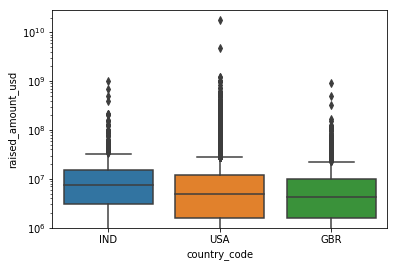

In [385]:
## check how the values look in these countries
sns.boxplot(x='country_code',y='raised_amount_usd',data=mf_ctry_ft)
plt.yscale('log')
plt.show()

## Checkpoint 4: Sector Analysis 1

In this sector analysis 1, one of the 8 main sectors will be mapped to the primary category in the master frame

### 4.1 Get Primary Sector for companies from Master frame

In [386]:
# check how many companies category_list have |
mf_ctry_ft[mf_ctry_ft['category_list'].str.contains("|",regex=False)].shape

(17581, 8)

In [387]:
#  get the primary sector from the category list and assign it a new column primary sector  
mf_ctry_ft.loc[:,'primary_category'] = mf_ctry_ft['category_list'].apply(lambda x: x.split("|")[0])
mf_ctry_ft.head()

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_category
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.00,#fame,media,operating,IND,media
7,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20000000.00,H2O.ai,analytics,operating,USA,analytics
8,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1700000.00,H2O.ai,analytics,operating,USA,analytics
9,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8900000.00,H2O.ai,analytics,operating,USA,analytics
15,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5000000.00,1 Mainstream,apps|cable|distribution|software,acquired,USA,apps


In [388]:
# check if the newly added primary_sector has any |
mf_ctry_ft[mf_ctry_ft['primary_category'].str.contains("|",regex=False)].shape

(0, 9)

### 4.2 Map Main sector from Mapping file

Load the mapping file in a dataframe

In [389]:
# load the mapping dataset to a dataframe
mapping = pd.read_csv("mapping.csv")

In [390]:
# check if the datanset has been loaded correctly
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


Handle any missing and invalid values in the mapping file

In [391]:
## Get the mapping info
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


There is 1 null value in the category_list. Drop this null value row

In [392]:
# drop the null value in the category list as its mapped blanks which is not helpful in the analysis
mapping.drop(mapping[mapping['category_list'].isnull()].index, inplace=True)
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 1 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        687 non-null int64
Blanks                                     687 non-null int64
Cleantech / Semiconductors                 687 non-null int64
Entertainment                              687 non-null int64
Health                                     687 non-null int64
Manufacturing                              687 non-null int64
News, Search and Messaging                 687 non-null int64
Others                                     687 non-null int64
Social, Finance, Analytics, Advertising    687 non-null int64
dtypes: int64(9), object(1)
memory usage: 59.0+ KB


Check if there any duplicates in category, any categories without main sector, any invalid characters in the category

In [393]:
## check if there are any duplicates in the category_list column
mapping[mapping['category_list'].duplicated()].shape

(0, 10)

In [394]:
##  check if there are any rows in mapping file that do not have any main sector mapping or more than 1 main sector mapping
mapping[(mapping.sum(axis=1)== 0) | (mapping.sum(axis=1) > 1)].shape

(0, 10)

In [395]:
## check if the category List has any non-ascii characters
mapping[mapping['category_list'].str.contains('[^\x00-\x7F]',regex=True)]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"


Convert the category to lower case and check of any category in mapping is not in master frame

In [396]:
## convert the category list to lower case for future matching
mapping['category_list'] = mapping['category_list'].str.lower()
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,0,1,0,0,0,0


In [397]:
## check if any category in the mapping file is not available in master frame
mapping[~(mapping['category_list'].isin(mf_ctry_ft['primary_category']))]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
33,aquaculture,0,0,1,0,0,0,0,0,0
49,b2b express delivery,0,0,0,0,0,0,0,0,1
59,big data a0lytics,0,0,0,0,0,0,0,0,1
64,biomass power generation,0,0,1,0,0,0,0,0,0
69,boating industry,1,0,0,0,0,0,0,0,0
77,building owners,0,0,0,0,0,0,1,0,0
79,business a0lytics,0,0,0,0,0,0,0,0,1


In [398]:
## on looking at the mapping data some of the categories have 0 in the category name in the category names. select them
mapping[mapping['category_list'].apply(lambda x: True if '0' in x else False)]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
59,big data a0lytics,0,0,0,0,0,0,0,0,1
79,business a0lytics,0,0,0,0,0,0,0,0,1
89,can0bis,0,0,0,0,1,0,0,0,0
91,career ma0gement,0,0,0,0,0,0,0,0,1
103,chi0 internet,0,0,0,0,0,0,1,0,0
114,cloud ma0gement,0,0,0,0,0,0,1,0,0
145,contact ma0gement,0,0,0,0,0,0,0,0,1
198,digital rights ma0gement,0,0,0,1,0,0,0,0,0


There are categories with "0" in their names.  The characters "na" seems to be incorrectly overwritten with "0". this needs to be corrected. The "0" in enterprise 2.0 should not be corrected

In [400]:
## replace the '0' in the category name to 'na' 
mapping['category_list'] = mapping['category_list'].apply(lambda x: (x.replace('0','na') if x!='enterprise 2.0' else x) if '0' in x else x)
mapping[mapping['category_list'].apply(lambda x: True if '0' in x else False)]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
243,enterprise 2.0,0,0,0,0,0,0,0,1,0


In [401]:
## check the category list
mapping[mapping['category_list'].str.contains('na',regex=False)]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
20,alternative medicine,0,0,0,0,1,0,0,0,0
22,analytics,0,0,0,0,0,0,0,0,1
59,big data analytics,0,0,0,0,0,0,0,0,1
79,business analytics,0,0,0,0,0,0,0,0,1
89,cannabis,0,0,0,0,1,0,0,0,0
91,career management,0,0,0,0,0,0,0,0,1
103,china internet,0,0,0,0,0,0,1,0,0
114,cloud management,0,0,0,0,0,0,1,0,0
145,contact management,0,0,0,0,0,0,0,0,1
198,digital rights management,0,0,0,1,0,0,0,0,0


Now, let's map one of the 8 main sectors to the category

In [402]:
#  map one of the eight main sectors to the primary sector
def map_main_sector(row):
    sector = row[row == 1].index[0]
    return sector
    
mapping['main_sector'] = mapping.apply(map_main_sector,axis=1)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
1,3d,0,0,0,0,0,1,0,0,0,Manufacturing
2,3d printing,0,0,0,0,0,1,0,0,0,Manufacturing
3,3d technology,0,0,0,0,0,1,0,0,0,Manufacturing
4,accounting,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
5,active lifestyle,0,0,0,0,1,0,0,0,0,Health


In [403]:
## create a dataframe with category and main sector columns
mapping_final= mapping[['category_list','main_sector']]
mapping_final.head()

,category_list,main_sector
1,3d,Manufacturing
2,3d printing,Manufacturing
3,3d technology,Manufacturing
4,accounting,"Social, Finance, Analytics, Advertising"
5,active lifestyle,Health


Add the main_sector to the master frame from the mapping dataframe

In [404]:
# check the primary sector in master frame that are not in mapping frame
mf_ctry_ft[~mf_ctry_ft['primary_category'].isin(mapping_final['category_list'])]['primary_category'].unique()

array(['natural gas uses', 'adaptive equipment', 'racing',
       'specialty retail', 'biotechnology and semiconductor',
       'rapidly expanding', 'product search', 'greentech', 'retirement'],
      dtype=object)

In [405]:
##  There are many primary sectors in master frame that are not in mapping file.  
## Get the number of master frame records with no main sector

mf_ctry_ft[~mf_ctry_ft['primary_category'].isin(mapping_final['category_list'])].shape

(11, 9)

In [406]:
## Get the number of records in master frame
mf_ctry_ft.shape

(38803, 9)

In [407]:
# merge the master_frame with mapping dataframe based on primary_sector. The inner join will retain only the master frame records that are in one of the 8 main sectors
mf_ctry_ft_sector = pd.merge(mf_ctry_ft, mapping_final, how='inner', left_on='primary_category', right_on='category_list')
mf_ctry_ft_sector.head()

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_category,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.00,#fame,media,operating,IND,media,media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.00,90min,media|news|publishing|soccer|sports,operating,GBR,media,media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.00,90min,media|news|publishing|soccer|sports,operating,GBR,media,media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,18000000.00,90min,media|news|publishing|soccer|sports,operating,GBR,media,media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5000000.00,All Def Digital,media,operating,USA,media,media,Entertainment


In [408]:
## print the permalink, category list, primary_sector, main_sector for some validation
mf_ctry_ft_sector[['permalink','primary_category','main_sector']].head()

,permalink,primary_category,main_sector
0,/organization/-fame,media,Entertainment
1,/organization/90min,media,Entertainment
2,/organization/90min,media,Entertainment
3,/organization/90min,media,Entertainment
4,/organization/all-def-digital,media,Entertainment


In [409]:
## The master frame records that did not have a match for the primary sector are also retained
mf_ctry_ft_sector.shape

(38792, 11)

# Checkpoint 5: Sector Analysis 2

In the sector analysis 2, we will find the top sectors for each of the countries

### 5.1 Create the dataframes for the Top 3 countries

In [410]:
## check how many rows have null values in main sector after the merge
mf_ctry_ft_sector['main_sector'].isnull().sum()

0

USA, GBR and IND are the three chosen countries. Create separate dataframes for them with the Investment count and Total Sum of investment

In [411]:
## create dataframe for Country1(USA) with range of funding between 5 and 15 million
D1_ctry_ft = mf_ctry_ft_sector[(mf_ctry_ft_sector['country_code'] == 'USA') & (mf_ctry_ft_sector['raised_amount_usd'] >= 5000000) & (mf_ctry_ft_sector['raised_amount_usd'] <= 15000000)].copy()
D1_ctry_ft.head()

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_category,category_list_y,main_sector
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5000000.00,All Def Digital,media,operating,USA,media,media,Entertainment
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,5000000.00,ChefsFeed,media|mobile|restaurants|technology,operating,USA,media,media,Entertainment
20,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,5000000.00,The Huffington Post,media|news|publishing,acquired,USA,media,media,Entertainment
21,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,5000000.00,The Huffington Post,media|news|publishing,acquired,USA,media,media,Entertainment
25,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,10000000.00,MatchMine,media|news|reviews and recommendations,closed,USA,media,media,Entertainment


In [412]:
# Get the total count and total amount for the main sectors
D1_Main_Sector =  D1_ctry_ft.groupby(by='main_sector').agg({'raised_amount_usd':['count','sum']})
D1_Main_Sector.columns = ['Count_of_Investments', 'Total_Investment']
D1_Main_Sector.reset_index(inplace=True)
D1_Main_Sector

,main_sector,Count_of_Investments,Total_Investment
0,Automotive & Sports,167,1454104361.00
1,Cleantech / Semiconductors,2350,21633430822.00
2,Entertainment,591,5099197982.00
3,Health,909,8211859357.00
4,Manufacturing,799,7258553378.00
5,"News, Search and Messaging",1583,13971567428.00
6,Others,2950,26321007002.00
7,"Social, Finance, Analytics, Advertising",2714,23807376964.00


In [413]:
# merge the dataframes to add the count of investments and total investment for the main sectors
D1 = pd.merge(D1_ctry_ft,D1_Main_Sector,how='inner',on='main_sector')
D1.head()

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_category,category_list_y,main_sector,Count_of_Investments,Total_Investment
0,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5000000.00,All Def Digital,media,operating,USA,media,media,Entertainment,591,5099197982.00
1,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,5000000.00,ChefsFeed,media|mobile|restaurants|technology,operating,USA,media,media,Entertainment,591,5099197982.00
2,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,5000000.00,The Huffington Post,media|news|publishing,acquired,USA,media,media,Entertainment,591,5099197982.00
3,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,5000000.00,The Huffington Post,media|news|publishing,acquired,USA,media,media,Entertainment,591,5099197982.00
4,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,10000000.00,MatchMine,media|news|reviews and recommendations,closed,USA,media,media,Entertainment,591,5099197982.00


In [414]:
## create dataframe for Country2(GBR) with range of funding between 5 and 15 million
D2_ctry_ft = mf_ctry_ft_sector[(mf_ctry_ft_sector['country_code'] == 'GBR') & (mf_ctry_ft_sector['raised_amount_usd'] >= 5000000) & (mf_ctry_ft_sector['raised_amount_usd'] <= 15000000)].copy()
D2_ctry_ft.head()

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_category,category_list_y,main_sector
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.00,90min,media|news|publishing|soccer|sports,operating,GBR,media,media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.00,90min,media|news|publishing|soccer|sports,operating,GBR,media,media,Entertainment
91,/organization/aihit,/funding-round/40cb08117155daba3aa7ad8b81b41068,venture,5500000.00,aiHit,analytics|artificial intelligence|business int...,acquired,GBR,analytics,analytics,"Social, Finance, Analytics, Advertising"
219,/organization/brandwatch,/funding-round/09f7932220728f0083982db2fced0518,venture,6000000.00,Brandwatch,analytics|social media,operating,GBR,analytics,analytics,"Social, Finance, Analytics, Advertising"
435,/organization/digital-shadows,/funding-round/ca618cebbc7e8ada0921af25e9955166,venture,8000000.00,Digital Shadows,analytics|cyber security|financial services|in...,operating,GBR,analytics,analytics,"Social, Finance, Analytics, Advertising"


In [415]:
# Get the total count and total amount for the main sectors
D2_Main_Sector =  D2_ctry_ft.groupby(by='main_sector').agg({'raised_amount_usd':['count','sum']})
D2_Main_Sector.columns = ['Count_of_Investments', 'Total_Investment']
D2_Main_Sector.reset_index(inplace=True)
D2_Main_Sector

,main_sector,Count_of_Investments,Total_Investment
0,Automotive & Sports,16,167051565.00
1,Cleantech / Semiconductors,130,1163990056.00
2,Entertainment,56,482784687.00
3,Health,24,214537510.00
4,Manufacturing,42,361940335.00
5,"News, Search and Messaging",73,615746235.00
6,Others,147,1283624289.00
7,"Social, Finance, Analytics, Advertising",133,1089404014.00


In [416]:
# merge the dataframes to add the count of investments and total investment for the main sectors
D2 = pd.merge(D2_ctry_ft,D2_Main_Sector,how='inner',on='main_sector')
D2.head()

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_category,category_list_y,main_sector,Count_of_Investments,Total_Investment
0,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.00,90min,media|news|publishing|soccer|sports,operating,GBR,media,media,Entertainment,56,482784687.00
1,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.00,90min,media|news|publishing|soccer|sports,operating,GBR,media,media,Entertainment,56,482784687.00
2,/organization/eutechnyx,/funding-round/d2fc787fbc5e4f468dff8b2c557993f1,venture,8800000.00,Eutechnyx,games,operating,GBR,games,games,Entertainment,56,482784687.00
3,/organization/mind-candy,/funding-round/47df01ed44d7b5916159051e5e32391e,venture,10000000.00,Mind Candy,games,operating,GBR,games,games,Entertainment,56,482784687.00
4,/organization/mind-candy,/funding-round/c6a873b4cbdd7ea3d023a771bd3b2f99,venture,10860000.00,Mind Candy,games,operating,GBR,games,games,Entertainment,56,482784687.00


In [417]:
## create dataframe for Country3(IND) with range of funding between 5 and 15 million
D3_ctry_ft = mf_ctry_ft_sector[(mf_ctry_ft_sector['country_code'] == 'IND') & (mf_ctry_ft_sector['raised_amount_usd'] >= 5000000) & (mf_ctry_ft_sector['raised_amount_usd'] <= 15000000)].copy()
D3_ctry_ft.head()

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_category,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.00,#fame,media,operating,IND,media,media,Entertainment
454,/organization/eka-software-solutions,/funding-round/2bbd8112aa5429fdf92f13fcb4254f71,venture,6000000.00,Eka Software Solutions,analytics|logistics|software|storage|supply ch...,operating,IND,analytics,analytics,"Social, Finance, Analytics, Advertising"
455,/organization/eka-software-solutions,/funding-round/7b4c0d627c52b378a7c2b5c2edb10c26,venture,10000000.00,Eka Software Solutions,analytics|logistics|software|storage|supply ch...,operating,IND,analytics,analytics,"Social, Finance, Analytics, Advertising"
723,/organization/loginext-solutions,/funding-round/ae317438267472aa73cb1ac43e66a525,venture,10000000.00,LogiNext Solutions,analytics|big data analytics|data visualizatio...,operating,IND,analytics,analytics,"Social, Finance, Analytics, Advertising"
741,/organization/manthan-systems,/funding-round/34b5d3d2bbd104d20d1a62a27220739f,venture,5700000.00,Manthan Systems,analytics|big data analytics|business intellig...,operating,IND,analytics,analytics,"Social, Finance, Analytics, Advertising"


In [418]:
# Get the total count and total amount for the main sectors
D3_Main_Sector =  D3_ctry_ft.groupby(by='main_sector').agg({'raised_amount_usd':['count','sum']})
D3_Main_Sector.columns = ['Count_of_Investments', 'Total_Investment']
D3_Main_Sector.reset_index(inplace=True)
D3_Main_Sector

,main_sector,Count_of_Investments,Total_Investment
0,Automotive & Sports,13,136900000.00
1,Cleantech / Semiconductors,20,165380000.00
2,Entertainment,33,280830000.00
3,Health,19,167740000.00
4,Manufacturing,21,200900000.00
5,"News, Search and Messaging",52,433834545.00
6,Others,110,1013409507.00
7,"Social, Finance, Analytics, Advertising",60,550549550.00


In [419]:
# merge the dataframes to add the count of investments and total investment for the main sectors
D3 = pd.merge(D3_ctry_ft,D3_Main_Sector,how='inner',on='main_sector')
D3.head()

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_category,category_list_y,main_sector,Count_of_Investments,Total_Investment
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.00,#fame,media,operating,IND,media,media,Entertainment,33,280830000.00
1,/organization/dhruva,/funding-round/6035248811c9530b11bd442d9239a0b1,venture,5000000.00,Dhruva,games,operating,IND,games,games,Entertainment,33,280830000.00
2,/organization/games2win,/funding-round/6b024f4906c288c66d1df966e6aeb256,venture,5000000.00,Games2Win,games,operating,IND,games,games,Entertainment,33,280830000.00
3,/organization/games2win,/funding-round/b095563fd43d1e4fd16da3f4bcd040af,venture,6000000.00,Games2Win,games,operating,IND,games,games,Entertainment,33,280830000.00
4,/organization/pokkt,/funding-round/adb94c131e001a7438a4695d873d8dc1,venture,5000000.00,POKKT,games,operating,IND,games,games,Entertainment,33,280830000.00


### 5.2 Perform investment analysis for the top 3 countries

Peform analysis for USA (country1)

In [420]:
## Get the total investment and total number of investments for each Country1 in the 8 sectors

print('Total number of investments : ',D1['raised_amount_usd'].count())
print('Total amount of investment : ',D1['raised_amount_usd'].sum())

Total number of investments :  12063
Total amount of investment :  107757097294.0


In [421]:
## Get the main sectors ordered by the count of investments for Country1
D1[~D1[['main_sector','Count_of_Investments']].duplicated()][['main_sector','Count_of_Investments']].sort_values(by='Count_of_Investments',ascending=False)

,main_sector,Count_of_Investments
4888,Others,2950
591,"Social, Finance, Analytics, Advertising",2714
8747,Cleantech / Semiconductors,2350
3305,"News, Search and Messaging",1583
7838,Health,909
11097,Manufacturing,799
0,Entertainment,591
11896,Automotive & Sports,167


In [422]:
# get the company that received the highest investment in top-1 sector
D1[D1['main_sector'] == 'Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/virtustream           64300000.00
/organization/capella               54968051.00
/organization/airtight-networks     54201907.00
/organization/decarta               52100000.00
/organization/black-duck-software   51000000.00
Name: raised_amount_usd, dtype: float64

In [423]:
# get the company that received the highest investment in top-1 sector
D1[D1['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/shotspotter   67933006.00
/organization/demandbase    63000000.00
/organization/intacct       61800000.00
/organization/netbase       60600000.00
/organization/lotame        59700000.00
Name: raised_amount_usd, dtype: float64

Based on the above analysis we know the top sectors and companies in those sectors for investment in USA

Analysis for GBR (country2)

In [424]:
## Get the total investment and total number of investments for each Country2 in the 8 sectors

print('Total number of investments : ',D2['raised_amount_usd'].count())
print('Total amount of investment : ',D2['raised_amount_usd'].sum())

Total number of investments :  621
Total amount of investment :  5379078691.0


In [425]:
## Get the main sectors ordered by the count of investments for Country2
D2[~D2[['main_sector','Count_of_Investments']].duplicated()][['main_sector','Count_of_Investments']].sort_values(by='Count_of_Investments',ascending=False)

,main_sector,Count_of_Investments
262,Others,147
56,"Social, Finance, Analytics, Advertising",133
433,Cleantech / Semiconductors,130
189,"News, Search and Messaging",73
0,Entertainment,56
563,Manufacturing,42
409,Health,24
605,Automotive & Sports,16


In [426]:
# get the company that received the highest investment in top-1 sector
D2[D2['main_sector'] == 'Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/electric-cloud            37000000.00
/organization/sensage                   36250000.00
/organization/enigmatic                 32500000.00
/organization/silverrail-technologies   29000000.00
/organization/opencloud                 27972766.00
Name: raised_amount_usd, dtype: float64

In [427]:
# get the company that received the highest investment in top-1 sector
D2[D2['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/celltick-technologies   37500000.00
/organization/mythings                34000000.00
/organization/zopa                    32900000.00
/organization/imagini                 28550000.00
/organization/marketinvoice           25553007.00
Name: raised_amount_usd, dtype: float64

Based on the above analysis we know the top sectors and companies in those sectors for investment in GBR

Analysis for India (country3)

In [428]:
## Get the total investment and total number of investments for each Country2

print('Total number of investments : ',D3['raised_amount_usd'].count())
print('Total amount of investment : ',D3['raised_amount_usd'].sum())

Total number of investments :  328
Total amount of investment :  2949543602.0


In [429]:
## Get the main sectors ordered by the count of investments for Country2
D3[~D3[['main_sector','Count_of_Investments']].duplicated()][['main_sector','Count_of_Investments']].sort_values(by='Count_of_Investments',ascending=False)

,main_sector,Count_of_Investments
145,Others,110
33,"Social, Finance, Analytics, Advertising",60
93,"News, Search and Messaging",52
0,Entertainment,33
294,Manufacturing,21
274,Cleantech / Semiconductors,20
255,Health,19
315,Automotive & Sports,13


In [430]:
# get the company that received the highest investment in top-1 sector
D3[D3['main_sector'] == 'Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/firstcry-com       39000000.00
/organization/myntra             38000000.00
/organization/commonfloor        32900000.00
/organization/pepperfry-com      28000000.00
/organization/itzcash-card-ltd   25000000.00
Name: raised_amount_usd, dtype: float64

In [431]:
# get the company that received the highest investment in top-1 sector
D3[D3['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/manthan-systems              50700000.00
/organization/komli-media                  28000000.00
/organization/shopclues-com                25000000.00
/organization/intarvo                      21900000.00
/organization/grameen-financial-services   21556050.00
Name: raised_amount_usd, dtype: float64

Based on the above analysis we know the top sectors and companies in those sectors for investment in IND

# Checkpoint 6 : Plots

###  6.1 Plot fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type

In [432]:
## read the cleaned master frame from the saved file
mf_2 =  pd.read_csv('master_frame_clean.csv',encoding='ISO-8859-1')

In [433]:
## check if the file loaded ok
mf_2.head()

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.00,#fame,media,operating,IND
1,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.00,:Qounter,application platforms|real time|social network...,operating,USA
2,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.00,0-6.com,curated web,operating,CHN
3,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,41250.00,01Games Technology,games,operating,HKG
4,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,43360.00,Ondine Biomedical Inc.,biotechnology,operating,CAN


Get the total investment across all funding types and then find the % of each investment. 
Also get the average investment for the 4 funding types venture, angel, seed and private equity

In [434]:
## get the total global investments
tot_glob_invsmt = mf_2['raised_amount_usd'].sum()
print(tot_glob_invsmt)

927239442067.0


In [435]:
# find total amount of funding by each funding type

mf_invsmt = mf_2.groupby(by='funding_round_type').agg({'raised_amount_usd':['sum','median']})
mf_invsmt.columns = ['total_investment','avg_investment']
mf_invsmt.reset_index(inplace=True)
mf_invsmt

,funding_round_type,total_investment,avg_investment
0,angel,4274925121.00,414906.00
1,convertible_note,1765086374.00,300000.00
2,debt_financing,111692753486.00,1096653.00
3,equity_crowdfunding,575164907.00,85000.00
4,grant,8750121993.00,225000.00
5,non_equity_assistance,28845203.00,60000.00
6,post_ipo_debt,25587220256.00,19900000.00
7,post_ipo_equity,39514081027.00,12262852.50
8,private_equity,134568045021.00,20000000.00
9,product_crowdfunding,446564880.00,211500.00


Calculate the % of investment of each funding type. Please note we are considering all funding types to calculate the %

In [454]:
## add a column for percentage investment. Please note

mf_invsmt['perc_invsmt'] = mf_invsmt['total_investment'] / tot_glob_invsmt

##mf_invsmt.set_index('funding_round_type',inplace=True)
format_dict = {'perc_invsmt':'{0:,.4f}','total_investment':'${0:,.2f}','avg_investment':'${0:,.2f}'}
mf_invsmt.style.format(format_dict)

,funding_round_type,total_investment,avg_investment,perc_invsmt
0,angel,"$4,274,925,121.00","$414,906.00",0.0046
1,convertible_note,"$1,765,086,374.00","$300,000.00",0.0019
2,debt_financing,"$111,692,753,486.00","$1,096,653.00",0.1205
3,equity_crowdfunding,"$575,164,907.00","$85,000.00",0.0006
4,grant,"$8,750,121,993.00","$225,000.00",0.0094
5,non_equity_assistance,"$28,845,203.00","$60,000.00",0.0000
6,post_ipo_debt,"$25,587,220,256.00","$19,900,000.00",0.0276
7,post_ipo_equity,"$39,514,081,027.00","$12,262,852.50",0.0426
8,private_equity,"$134,568,045,021.00","$20,000,000.00",0.1451
9,product_crowdfunding,"$446,564,880.00","$211,500.00",0.0005


In [437]:
# create the labels for the pie chart. create labels only for angel','private_equity','seed','venture'
labels_1 =[]

def create_labels(row):
    if row[0] in ['angel','private_equity','seed','venture']:
        labels_1.append('Type={0}, % of Total = {1:0.2%}, Average = {2:0.2f}'.format(row[0],row[3],row[2]))
    else:
        labels_1.append(row[0])

mf_invsmt.apply(create_labels,axis=1)

print(labels_1)

['Type=angel, % of Total = 0.46%, Average = 414906.00', 'convertible_note', 'debt_financing', 'equity_crowdfunding', 'grant', 'non_equity_assistance', 'post_ipo_debt', 'post_ipo_equity', 'Type=private_equity, % of Total = 14.51%, Average = 20000000.00', 'product_crowdfunding', 'secondary_market', 'Type=seed, % of Total = 1.70%, Average = 300000.00', 'undisclosed', 'Type=venture, % of Total = 60.45%, Average = 5000000.00']


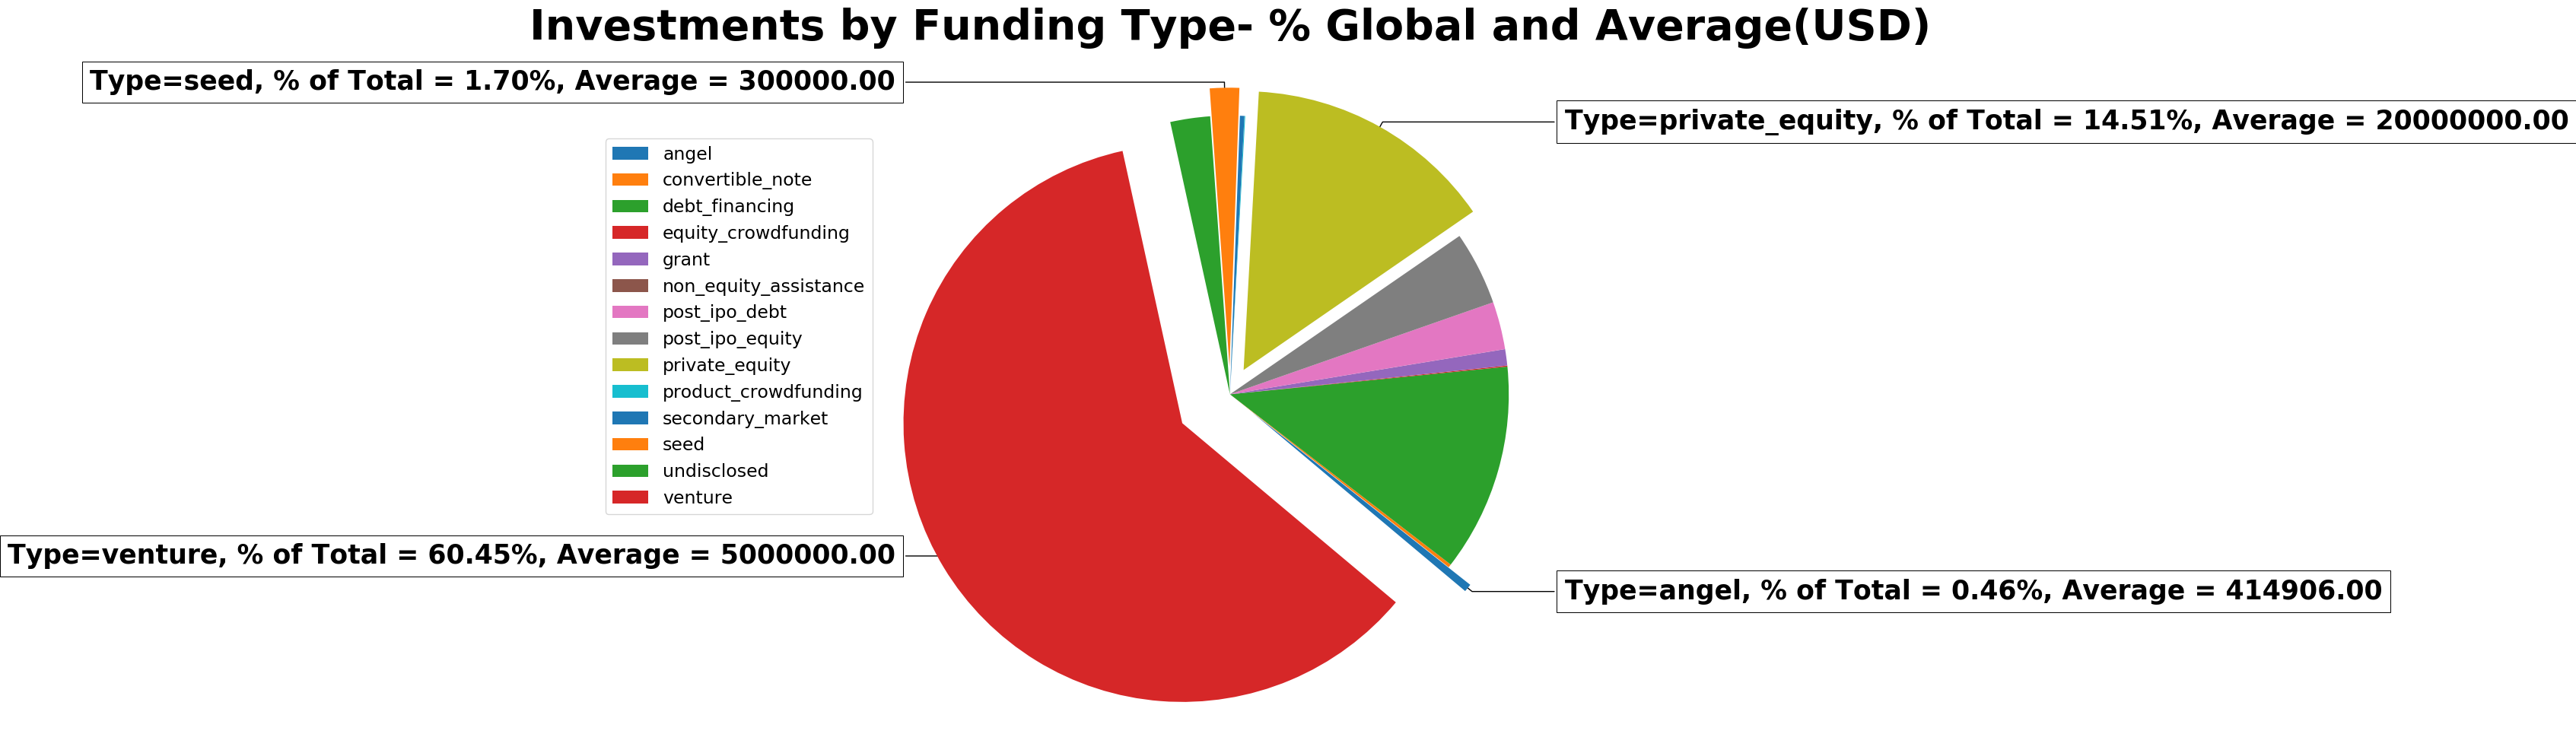

In [442]:
##  A plot showing the fraction/percentage of total investments (globally) in angel, venture. 
### seed, and private equity, and the average amount of investment in each funding typ

fig, ax = plt.subplots(figsize=(20,10),subplot_kw=dict(aspect="equal"))

plt.rcdefaults() 
##plt.rcParams.update({'font.size': 20,'font.family':'DejaVu Sans','font.weight':'bold'})

explode = (0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.2)
wedges, texts = ax.pie(mf_invsmt['perc_invsmt'],startangle=-40,explode=explode)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    
    if mf_invsmt.loc[i,'funding_round_type'] in ['angel','private_equity','seed','venture']:
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels_1[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.12*y),
                    fontsize=25, fontweight = 'bold', horizontalalignment=horizontalalignment, **kw)

ax.set_title("Investments by Funding Type- % Global and Average(USD)",fontsize=40,fontweight='bold')

ax.legend(wedges,mf_invsmt['funding_round_type'],
          loc="upper right",
          bbox_to_anchor=(0, 0.88),fontsize=17)
plt.tight_layout()
plt.show()

###  6.2  Plot showing the top 9 countries against the total amount of investments of funding type FT

In [443]:
top9

,country_code,raised_amount_usd
0,USA,420068029342.00
1,CHN,39338918773.00
2,GBR,20072813004.00
3,IND,14261508718.00
4,CAN,9482217668.00
5,FRA,7226851352.00
6,ISR,6854350477.00
7,DEU,6306921981.00
8,JPN,3167647127.00


In [444]:
top9['raised_amount_busd'] = top9['raised_amount_usd'] / 1000000000
top9

,country_code,raised_amount_usd,raised_amount_busd
0,USA,420068029342.00,420.07
1,CHN,39338918773.00,39.34
2,GBR,20072813004.00,20.07
3,IND,14261508718.00,14.26
4,CAN,9482217668.00,9.48
5,FRA,7226851352.00,7.23
6,ISR,6854350477.00,6.85
7,DEU,6306921981.00,6.31
8,JPN,3167647127.00,3.17


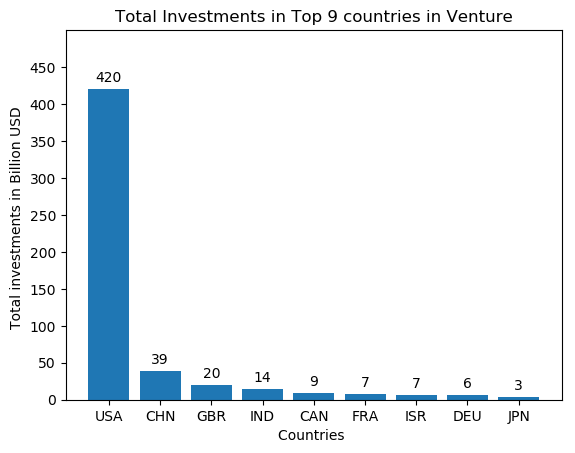

In [445]:
plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
plot1 = ax.bar(top9.index,top9['raised_amount_busd'])
plt.ylabel("Total investments in Billion USD ")
plt.xlabel("Countries ")
plt.ylim(0,500)
plt.yticks(np.arange(0,500,50))
plt.xticks(np.arange(0,9),top9['country_code'])
plt.title('Total Investments in Top 9 countries in Venture')

for rect in plot1:
    height = rect.get_height()
    ax.annotate('{0:0.0f}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

###  6.2  Plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT)

In [455]:
#Get Top3 sectors from Country1
D1_Top3_Sector = D1[~D1[['country_code','main_sector','Count_of_Investments']].duplicated()][['country_code','main_sector','Count_of_Investments']].sort_values(by='Count_of_Investments',ascending=False).head(4)
D1_Top3_Sector

,country_code,main_sector,Count_of_Investments
4888,USA,Others,2950
591,USA,"Social, Finance, Analytics, Advertising",2714
8747,USA,Cleantech / Semiconductors,2350
3305,USA,"News, Search and Messaging",1583


In [456]:
#Get Top3 sectors from Country2
D2_Top3_Sector = D2[~D2[['country_code','main_sector','Count_of_Investments']].duplicated()][['country_code','main_sector','Count_of_Investments']].sort_values(by='Count_of_Investments',ascending=False).head(4)
D2_Top3_Sector

,country_code,main_sector,Count_of_Investments
262,GBR,Others,147
56,GBR,"Social, Finance, Analytics, Advertising",133
433,GBR,Cleantech / Semiconductors,130
189,GBR,"News, Search and Messaging",73


In [457]:
#Get Top3 sectors from Country3
D3_Top3_Sector = D3[~D3[['country_code','main_sector','Count_of_Investments']].duplicated()][['country_code','main_sector','Count_of_Investments']].sort_values(by='Count_of_Investments',ascending=False).head(4)
D3_Top3_Sector

,country_code,main_sector,Count_of_Investments
145,IND,Others,110
33,IND,"Social, Finance, Analytics, Advertising",60
93,IND,"News, Search and Messaging",52
0,IND,Entertainment,33


In [458]:
## merge the Top3 sectors from Country1, Country2, Country3 to a dataframe
D_all =  pd.concat([D1_Top3_Sector,D2_Top3_Sector,D3_Top3_Sector])
D_all.reset_index(drop=True,inplace=True)
D_all

,country_code,main_sector,Count_of_Investments
0,USA,Others,2950
1,USA,"Social, Finance, Analytics, Advertising",2714
2,USA,Cleantech / Semiconductors,2350
3,USA,"News, Search and Messaging",1583
4,GBR,Others,147
5,GBR,"Social, Finance, Analytics, Advertising",133
6,GBR,Cleantech / Semiconductors,130
7,GBR,"News, Search and Messaging",73
8,IND,Others,110
9,IND,"Social, Finance, Analytics, Advertising",60


In [459]:
## Create the labels with country and main sector to be used in the plot
labels_2 = list(map(lambda x,y : x+" , "+y,D_all['country_code'],D_all['main_sector']))
labels_2

['USA , Others',
 'USA , Social, Finance, Analytics, Advertising',
 'USA , Cleantech / Semiconductors',
 'USA , News, Search and Messaging',
 'GBR , Others',
 'GBR , Social, Finance, Analytics, Advertising',
 'GBR , Cleantech / Semiconductors',
 'GBR , News, Search and Messaging',
 'IND , Others',
 'IND , Social, Finance, Analytics, Advertising',
 'IND , News, Search and Messaging',
 'IND , Entertainment']

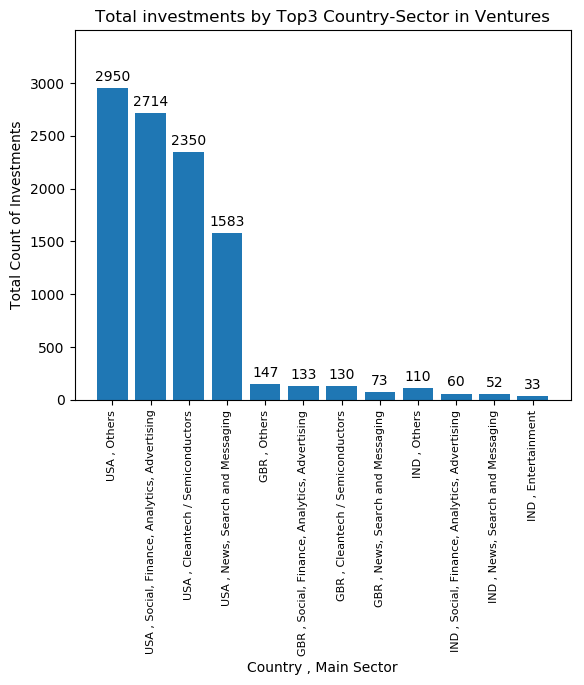

In [461]:
### Plot the barchart with the Top countries and Sectors ordered with appropriate annotation

plt.figure(figsize=(20,15))
fig, ax = plt.subplots()

plot1 = ax.bar(D_all.index,D_all['Count_of_Investments'])

plt.ylabel("Total Count of Investments")
plt.xlabel("Country , Main Sector")
plt.ylim(0,3500)
plt.yticks(np.arange(0,3500,500))
plt.xticks(np.arange(0,12),labels_2,rotation='vertical',fontsize=8)
plt.title('Total investments by Top3 Country-Sector in Ventures')

for rect in plot1:
    height = rect.get_height()
    ax.annotate('{0:0.0f}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()